In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_df=pd.read_csv("../cleaned_csvs/Data_2020.csv")

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22539 entries, 0 to 22538
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           22539 non-null  int64  
 1   FL_DATE              22539 non-null  object 
 2   OP_UNIQUE_CARRIER    22539 non-null  object 
 3   ORIGIN               22539 non-null  object 
 4   ORIGIN_CITY_NAME     22539 non-null  object 
 5   DEST                 22539 non-null  object 
 6   DEST_CITY_NAME       22539 non-null  object 
 7   CRS_DEP_TIME         22539 non-null  int64  
 8   DEP_DELAY            21118 non-null  float64
 9   DEP_DELAY_NEW        21118 non-null  float64
 10  ARR_TIME             21115 non-null  float64
 11  ARR_DELAY            21096 non-null  float64
 12  ARR_DELAY_NEW        21096 non-null  float64
 13  CANCELLED            22539 non-null  float64
 14  CARRIER_DELAY        2493 non-null   float64
 15  WEATHER_DELAY        2493 non-null  

In [4]:
# Delete Unwated Columns

del data_df['Unnamed: 0']
del data_df['ORIGIN_CITY_NAME']
del data_df['DEST_CITY_NAME']
del data_df['ARR_TIME']
del data_df['DEP_DELAY']
del data_df['ARR_DELAY']
del data_df['ARR_DELAY_NEW']
del data_df['CRS_DEP_TIME']

data_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month
0,2020-01-01,WN,PHX,CLE,6.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
1,2020-01-01,WN,STL,CLE,14.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
2,2020-01-01,WN,STL,CLE,20.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
3,2020-01-02,WN,ATL,CLE,2.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
4,2020-01-02,WN,ATL,CLE,20.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22534,2020-03-11,UA,CLE,DEN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,3
22535,2020-03-11,UA,EWR,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,3
22536,2020-03-11,UA,CLE,ORD,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,3
22537,2020-03-11,UA,CLE,SFO,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,3


In [5]:
# FLights Departing from Cleveland Airport "CLE"

dep_cle_df=data_df.loc[data_df["ORIGIN"] =="CLE"]
dep_cle_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month
15,2020-01-31,WN,CLE,ATL,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
16,2020-01-31,WN,CLE,BNA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
17,2020-01-31,WN,CLE,BNA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
18,2020-01-31,WN,CLE,BWI,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
19,2020-01-31,WN,CLE,BWI,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22532,2020-03-11,UA,CLE,ORD,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,3
22534,2020-03-11,UA,CLE,DEN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,3
22536,2020-03-11,UA,CLE,ORD,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,3
22537,2020-03-11,UA,CLE,SFO,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,3


In [6]:
dep_cle_df['OP_UNIQUE_CARRIER'].unique()

array(['WN', 'MQ', 'YV', 'AA', 'F9', 'NK', 'DL', 'OO', 'UA', 'YX', '9E',
       'EV', 'OH', 'G4', 'B6'], dtype=object)

In [7]:
# Add unique carrier name column
# create dict of unique_carrier codes to names
# map to unique_carrier column to transform values to strings
# carrier names were acquired from BTS statistics definitions

unique_carrier_dict = {'F9':'Frontier','DL':'Delta',
                       'NK':'Spirit','EV':'ExpressJet','OO':'SkyWest Airlines',
                       'UA':'United','AA':'American Airlines',
                       'B6':'JetBlue','WN':'Southwest Airlines', 'OH':'US Airways',
                       'YX':'Republic Airways', '9E':'Endeavor Air', 'MQ':'Envoy Air Inc',
                       'YV':'Mesa Airlines', 'G4':'Allegiant Air'}

#map dict to unique_carrier column

dep_cle_df['unique_carrier_nm'] = dep_cle_df['OP_UNIQUE_CARRIER'].map(unique_carrier_dict)

#view final dataframe on flight origin and destination

dep_cle_df.head()

/Users/diegogonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm
15,2020-01-31,WN,CLE,ATL,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1,Southwest Airlines
16,2020-01-31,WN,CLE,BNA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1,Southwest Airlines
17,2020-01-31,WN,CLE,BNA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1,Southwest Airlines
18,2020-01-31,WN,CLE,BWI,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1,Southwest Airlines
19,2020-01-31,WN,CLE,BWI,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,1,Southwest Airlines


In [8]:
# Clear NaNs

dep_clean_df = dep_cle_df.fillna(0)
dep_clean_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm
15,2020-01-31,WN,CLE,ATL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines
16,2020-01-31,WN,CLE,BNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines
17,2020-01-31,WN,CLE,BNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines
18,2020-01-31,WN,CLE,BWI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines
19,2020-01-31,WN,CLE,BWI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22532,2020-03-11,UA,CLE,ORD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,3,United
22534,2020-03-11,UA,CLE,DEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,3,United
22536,2020-03-11,UA,CLE,ORD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,3,United
22537,2020-03-11,UA,CLE,SFO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,3,United


In [9]:
fligh_per_carrier_df = dep_clean_df.groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Number of flights per Carrier')
fligh_per_carrier_df

,Airline,Number of flights per Carrier
0,Allegiant Air,142
1,American Airlines,434
2,Delta,759
3,Endeavor Air,1167
4,Envoy Air Inc,776
5,ExpressJet,830
6,Frontier,908
7,JetBlue,369
8,Mesa Airlines,202
9,Republic Airways,888


<function matplotlib.pyplot.show(*args, **kw)>

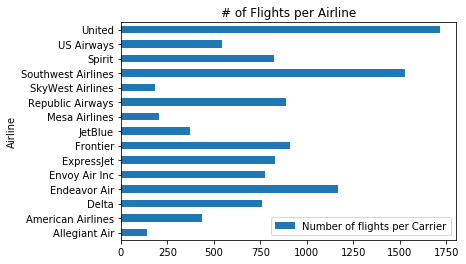

In [10]:
# plot number of flights per carrier

fligh_per_carrier_df.plot.barh(x='Airline', y='Number of flights per Carrier',
                               title="# of Flights per Airline");

plt.savefig('../delays/plots/Number of Flights per Airline - 2020.jpg',bbox_inches='tight', dpi=150)
plt.show

In [11]:
# Create a column with Ontime, Late Cancelled status

dep_clean_df.loc[dep_clean_df.DEP_DELAY_NEW <= 15, "Flight Status"]="OnTime"
dep_clean_df.loc[dep_clean_df.DEP_DELAY_NEW > 15, "Flight Status"]="Late"
dep_clean_df.loc[dep_clean_df.CANCELLED == 1, "Flight Status"]="Cancelled"
dep_clean_df.head()

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm,Flight Status
15,2020-01-31,WN,CLE,ATL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines,OnTime
16,2020-01-31,WN,CLE,BNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines,OnTime
17,2020-01-31,WN,CLE,BNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines,OnTime
18,2020-01-31,WN,CLE,BWI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines,OnTime
19,2020-01-31,WN,CLE,BWI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Southwest Airlines,OnTime


In [12]:
# Count Flight Status

flightstatus_df = dep_clean_df.groupby('Flight Status')['Flight Status'].count()
flightstatus_df

Flight Status
Cancelled     715
Late         1088
OnTime       9464
Name: Flight Status, dtype: int64

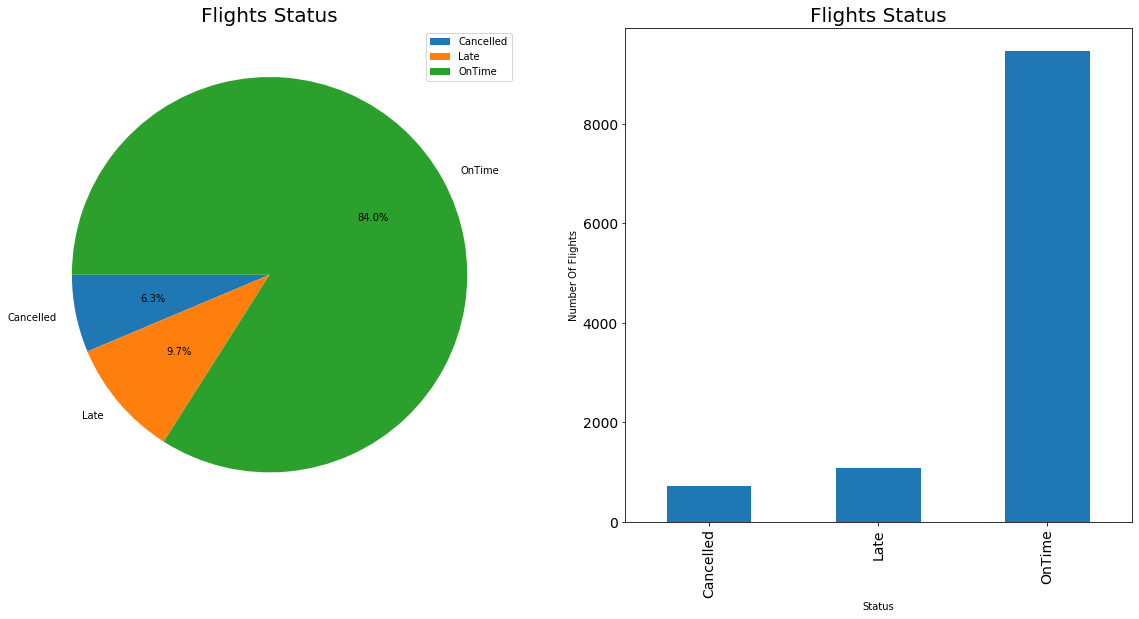

In [13]:
# Plot FLight Status

fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(221)
ax.pie(flightstatus_df, labels=flightstatus_df.index, startangle=180, autopct='%1.1f%%')
ax.set_title("Flights Status", fontsize=20);
plt.gcf().gca()
plt.legend()

ax2 = fig.add_subplot(222)
ax2.set_title("Flights Status", fontsize=20);
ax2.set_facecolor('white')
flightstatus_df.plot(kind='bar', ax=ax2,  legend=False, fontsize=14)
plt.xlabel('Status')
plt.ylabel('Number Of Flights')
plt.savefig('../delays/plots/flight status - 2020.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [14]:
# Flitering flights by delays > 15 min

delays_df = dep_clean_df.loc[dep_clean_df['DEP_DELAY_NEW'] > 15]
delays_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm,Flight Status
68,2020-01-07,WN,CLE,MKE,83.0,0.0,0.0,0.0,0.0,0.0,58.0,2020,1,Southwest Airlines,Late
84,2020-01-12,MQ,CLE,ORD,31.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Envoy Air Inc,Late
95,2020-01-23,MQ,CLE,ORD,28.0,0.0,0.0,0.0,0.0,0.0,25.0,2020,1,Envoy Air Inc,Late
96,2020-01-24,MQ,CLE,ORD,22.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,Envoy Air Inc,Late
100,2020-01-28,MQ,CLE,ORD,27.0,0.0,0.0,0.0,0.0,0.0,23.0,2020,1,Envoy Air Inc,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21969,2020-03-07,WN,CLE,MCO,27.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,3,Southwest Airlines,Late
21971,2020-03-07,WN,CLE,MCO,16.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,3,Southwest Airlines,Late
22023,2020-03-21,DL,CLE,ATL,148.0,0.0,148.0,0.0,20.0,0.0,0.0,2020,3,Delta,Late
22311,2020-03-28,UA,CLE,ORD,47.0,0.0,0.0,0.0,66.0,0.0,0.0,2020,3,United,Late


In [15]:
# Grouping delayed flights by carrier

groupby_df = delays_df.groupby(['unique_carrier_nm'])['DEP_DELAY_NEW'].count()
groupby_df

unique_carrier_nm
Allegiant Air          20
American Airlines      38
Delta                  42
Endeavor Air           96
Envoy Air Inc         105
ExpressJet            101
Frontier              130
JetBlue                30
Mesa Airlines          12
Republic Airways       80
SkyWest Airlines       20
Southwest Airlines     94
Spirit                118
US Airways             89
United                113
Name: DEP_DELAY_NEW, dtype: int64

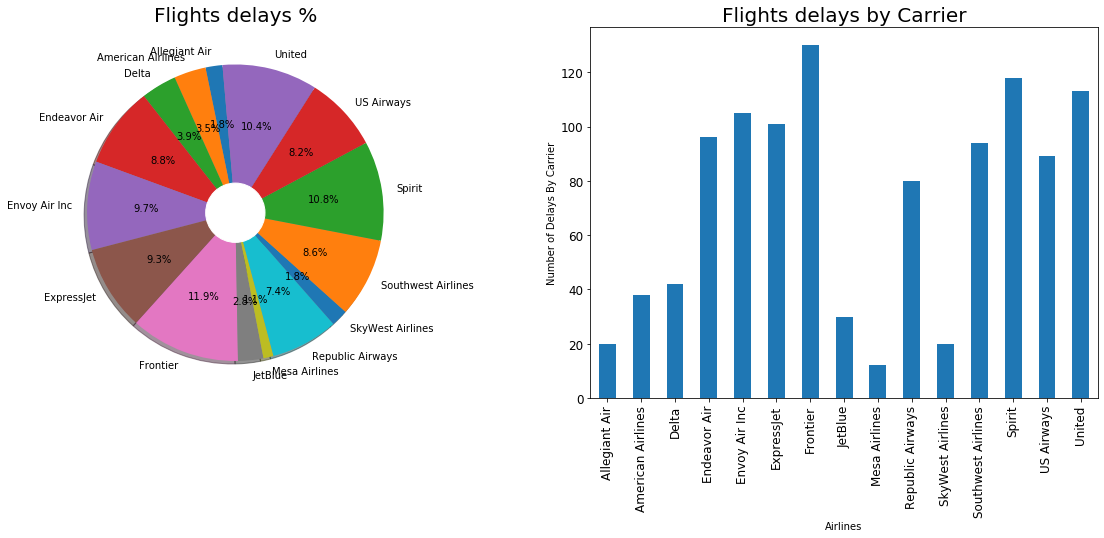

In [16]:
# Plot Delayed flights by carrier

fig = plt.figure(figsize=[20, 15])
ax = fig.add_subplot(221)
ax.pie(groupby_df, labeldistance=1.1, labels=groupby_df.index, startangle=95, autopct='%1.1f%%', shadow=True)
ax.set_title("Flights delays %", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))

ax2 = fig.add_subplot(222)
ax2.set_title("Flights delays by Carrier", fontsize=20);
ax2.set_facecolor('white')
groupby_df.plot(kind='bar', ax=ax2,  legend=False, fontsize=12)
plt.xlabel('Airlines')
plt.ylabel('Number of Delays By Carrier')
plt.savefig('../delays/plots/Flights delays by Carrier - 2020.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [17]:
# Filter Delays by category

# Carrier Delays

delays_df[delays_df['CARRIER_DELAY'] > 15]['CARRIER_DELAY'].count()

337

In [18]:
carrier_delays_df = delays_df.loc[delays_df['CARRIER_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Carrier Delays')
carrier_delays_df

,Airline,Carrier Delays
0,Allegiant Air,6
1,American Airlines,15
2,Delta,13
3,Endeavor Air,28
4,Envoy Air Inc,23
5,ExpressJet,17
6,Frontier,52
7,JetBlue,14
8,Mesa Airlines,6
9,Republic Airways,30


In [19]:
# Weather Delays

delays_df[delays_df['WEATHER_DELAY'] > 15]['WEATHER_DELAY'].count()

19

In [20]:
weather_delays_df = delays_df.loc[delays_df['WEATHER_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Weather Delays')
weather_delays_df

,Airline,Weather Delays
0,American Airlines,2
1,Delta,2
2,Envoy Air Inc,1
3,ExpressJet,1
4,Frontier,5
5,JetBlue,1
6,Mesa Airlines,1
7,Republic Airways,2
8,Spirit,2
9,US Airways,1


In [21]:
# NAS Delays

delays_df[delays_df['NAS_DELAY'] > 15]['NAS_DELAY'].count()

253

In [22]:
nas_delays_df = delays_df.loc[delays_df['NAS_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='NAS Delays')
nas_delays_df

,Airline,NAS Delays
0,Allegiant Air,5
1,American Airlines,8
2,Delta,10
3,Endeavor Air,21
4,Envoy Air Inc,23
5,ExpressJet,55
6,Frontier,19
7,JetBlue,5
8,Republic Airways,24
9,SkyWest Airlines,9


In [23]:
# Security Delays

delays_df[delays_df['SECURITY_DELAY'] > 15]['SECURITY_DELAY'].count()

2

In [24]:
security_delays_df = delays_df.loc[delays_df['SECURITY_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Security Delays')
security_delays_df

,Airline,Security Delays
0,Spirit,2


In [25]:
#Late Aircraft Delays

delays_df[delays_df['LATE_AIRCRAFT_DELAY'] > 15]['LATE_AIRCRAFT_DELAY'].count()

364

In [26]:
late_aircaft_df = delays_df.loc[delays_df['LATE_AIRCRAFT_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Late Aircraft Delays')
late_aircaft_df

,Airline,Late Aircraft Delays
0,Allegiant Air,11
1,American Airlines,12
2,Delta,11
3,Endeavor Air,43
4,Envoy Air Inc,49
5,ExpressJet,14
6,Frontier,43
7,JetBlue,7
8,Mesa Airlines,2
9,Republic Airways,21


In [27]:
# Merge Delays per Category

merge = pd.merge(carrier_delays_df, weather_delays_df)
merge2 = pd.merge(merge, nas_delays_df)
merge3 =pd.merge(merge2, late_aircaft_df)
merge4 = pd.merge(merge3, security_delays_df, how='outer')
delays_category = merge4.fillna(0)
delays_category

,Airline,Carrier Delays,Weather Delays,NAS Delays,Late Aircraft Delays,Security Delays
0,American Airlines,15,2,8,12,0.0
1,Delta,13,2,10,11,0.0
2,Envoy Air Inc,23,1,23,49,0.0
3,ExpressJet,17,1,55,14,0.0
4,Frontier,52,5,19,43,0.0
5,JetBlue,14,1,5,7,0.0
6,Republic Airways,30,2,24,21,0.0
7,Spirit,45,2,30,19,2.0
8,US Airways,16,1,12,60,0.0
9,United,42,1,25,43,0.0


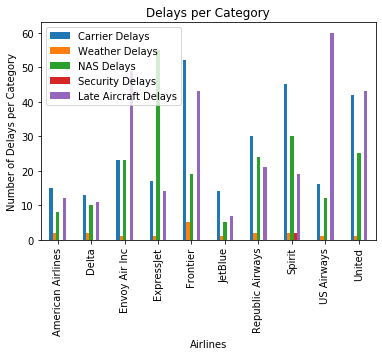

In [28]:
# Plot Delays by category

delays_category.plot(x="Airline", y=["Carrier Delays", "Weather Delays", "NAS Delays", "Security Delays", "Late Aircraft Delays"], kind="bar")
plt.xlabel('Airlines')
plt.ylabel('Number of Delays per Category')
plt.title('Delays per Category')
plt.savefig('../delays/plots/Delays per category - 2020.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [29]:
# Flights By Month

delays_df.loc[:, 'month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  ['01-Jan', '02-Feb', '03-March', '04-Apr', '05-May', '06-Jun',
                                  '07-Jul', '08-Aug', '09-Sep', '10-Oct', '11-Nov', '12-Dec'],
                                  inplace=True)

monthly_flights_df = dep_clean_df.groupby(['month'])['month'].count()
monthly_flights_df


/Users/diegogonzalez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


month
1    3567
2    3533
3    4167
Name: month, dtype: int64

In [30]:
# Delays by month

delays_df.loc[:, 'month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  ['01-Jan', '02-Feb', '03-March', '04-Apr', '05-May', '06-Jun',
                                  '07-Jul', '08-Aug', '09-Sep', '10-Oct', '11-Nov', '12-Dec'],
                                  inplace=True)

month_delay = delays_df.groupby(['month'])['DEP_DELAY_NEW'].count()
month_delay

month
01-Jan      377
02-Feb      462
03-March    249
Name: DEP_DELAY_NEW, dtype: int64

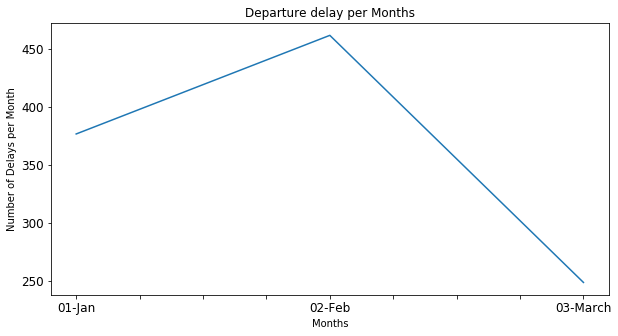

In [31]:
month_delay.plot(figsize=[10,5], title ="Departure delay per Months",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.xlabel('Months')
plt.ylabel('Number of Delays per Month')
plt.savefig('../delays/plots/Number of Delays per Month - 2020.jpg',bbox_inches='tight', dpi=150)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

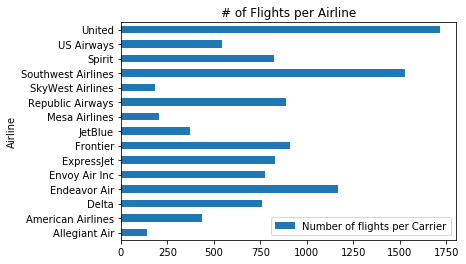

In [32]:
# plot number of flights per carrier

fligh_per_carrier_df.plot.barh(x='Airline', y='Number of flights per Carrier',
                               title="# of Flights per Airline");


plt.savefig('../delays/plots/Number of Flights per Airline - 2020.jpg',bbox_inches='tight', dpi=150)
plt.show